# SVR预测与集成学习预测

In [8]:
## 导入问题三需要的库和数据集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [10]:
## 
p3_df = pd.read_csv('p3data.csv',encoding='GBK')

y_s = p3_df['产品硫含量']

p3_df = p3_df.drop('产品硫含量',axis=1)
# X1 = p3_df.drop('产品辛烷值',axis = 1)
# y1 = p3_df['产品辛烷值']

p3_data = p3_df.values

## 获得原始数据的最大值与最小值，方便后面还原数据
y_min = np.min(p3_data[:,-1])
y_max = np.max(p3_data[:,-1])
## 对数据进行归一化
from sklearn.preprocessing import MinMaxScaler

# 初始化归一化器
scaler = MinMaxScaler()

# 对数据进行归一化处理
data = scaler.fit_transform(p3_data)

X = data[:,:-1]

y = data[:,-1]
# 将数据集分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




R-squared:
 0.954021321789622
MSE:
 0.0014952311323055553
MAE:
 0.030007340850688565
RMSE:
 0.03866821863372497


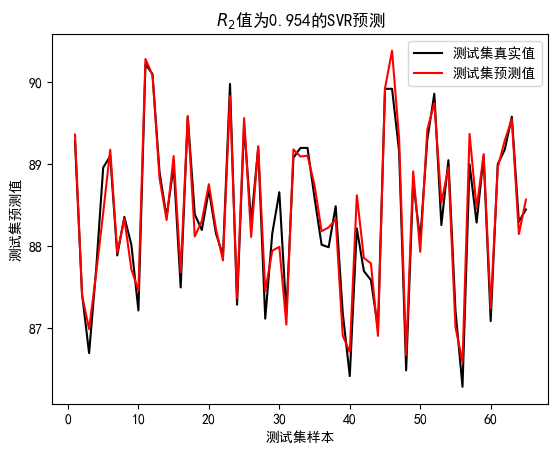

In [11]:
## 使用支持向量回归对数据进行预测
from sklearn.svm import  SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

# 建立SVR模型
svr_model = SVR(kernel='linear', C=1.5, epsilon=0.011)

# 训练SVR模型
svr_model.fit(X_train, y_train)

# 使用SVR模型进行预测
y_pred = svr_model.predict(X_test)

# 评估SVR模型的性能

## 决定系数：R2 评估预测模型拟合程度的一种指标，它表示预测值与真实值的协方差占真实值方差的比例。$R^2$越接近1，说明预测结果越接近真实值
r2 = r2_score(y_test, y_pred)  

## 均方误差
mse = mean_squared_error(y_test,y_pred) # MSE是预测值与真实值之差的平方的平均值。MSE越小，说明预测结果与真实值越接近

## 平均绝对误差
mae = mean_absolute_error(y_test,y_pred) #MAE是预测值与真实值之差的绝对值的平均值。MAE越小，说明预测结果与真实值越接近
# 均方根误差（RMSE）
rmse = np.sqrt(mse)

print('R-squared:\n', r2)  # 0.9542180965997185
print('MSE:\n',mse)
print('MAE:\n',mae)
print("RMSE:\n", rmse)

## 将测试集预测的数据与原始数据进行画图展示
x_vector = list(i for i in range(1,y_pred.shape[0]+1))
y_true = y_test*(y_max-y_min)+y_min
y_pre = y_pred*(y_max-y_min)+y_min
## 作图
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x_vector,y_true,'k-')
plt.plot(x_vector,y_pre,'r-')
plt.xlabel('测试集样本')
plt.ylabel('测试集预测值')
plt.title('$R_2$值为{}的SVR预测'.format(round(r2,4)))
plt.legend(['测试集真实值','测试集预测值'])
import os 
if not os.path.exists("Images"):
    os.mkdir("Images")
plt.savefig('Images/SVR_predict.png')
plt.show()

In [12]:
## 使用集成学习方法对产品辛烷值进行预测
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
# 定义三个基本回归器
reg1 = LinearRegression()  ##线性回归
reg2 = RandomForestRegressor(n_estimators=10, random_state=42) ## 随机森林
reg3 = GradientBoostingRegressor(random_state=42) ## 梯度提升树

# 定义一个投票回归器
ensemble = VotingRegressor(estimators=[('lr', reg1), ('rf', reg2), ('gb', reg3)])

# 训练投票回归器
ensemble.fit(X_train, y_train)

# 在测试集上评估回归器
y_pred = ensemble.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
## 平均绝对误差
mae = mean_absolute_error(y_test,y_pred) #MAE是预测值与真实值之差的绝对值的平均值。MAE越小，说明预测结果与真实值越接近
# 均方根误差（RMSE）
rmse = np.sqrt(mse)
#  决定系数
r2 = r2_score(y_test, y_pred)

print("MSE:\n", mse)
print("R2 Score:\n", r2)
print('MAE:\n',mae)
print("RMSE:\n", rmse)

MSE:
 0.001599665477179916
R2 Score:
 0.9508099432720507
MAE:
 0.030049235295787374
RMSE:
 0.039995818246160636


通过对比 R2、MSE、MAE、RMSE 发现SVR的预测效果要优于集成学习的效果，下面使用神经网络进行预测

# 使用神经网络进行产品辛烷值预测

d:\python\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [10/200], Loss: 0.0188
Epoch [20/200], Loss: 0.0055
Epoch [30/200], Loss: 0.0036
Epoch [40/200], Loss: 0.0051
Epoch [50/200], Loss: 0.0116
Epoch [60/200], Loss: 0.0041
Epoch [70/200], Loss: 0.0041
Epoch [80/200], Loss: 0.0078
Epoch [90/200], Loss: 0.0047
Epoch [100/200], Loss: 0.0037
Epoch [110/200], Loss: 0.0118
Epoch [120/200], Loss: 0.0050
Epoch [130/200], Loss: 0.0049
Epoch [140/200], Loss: 0.0087
Epoch [150/200], Loss: 0.0037
Epoch [160/200], Loss: 0.0045
Epoch [170/200], Loss: 0.0083
Epoch [180/200], Loss: 0.0067
Epoch [190/200], Loss: 0.0042
Epoch [200/200], Loss: 0.0081
R-squared:
 0.9515398608771594
MSE:
 0.04460255835259987
MAE:
 0.16703807654747432
RMSE:
 0.21119317780790145


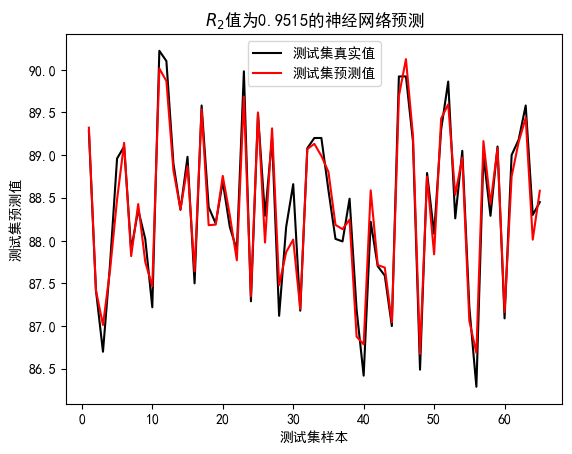

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# 定义数据集类
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# 定义模型类
class MyModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 定义超参数
input_dim = 30
hidden_dim = 10
output_dim = 1
learning_rate = 0.01
num_epochs = 200
l1_coff = 0.001  # L1正则化系数
torch.manual_seed(1)
# 准备数据
X = X_train # 特征矩阵
y = y_train # 标签矩阵
dataset = MyDataset(X, y)
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

# 初始化模型、损失函数和优化器
model = MyModel(input_dim, hidden_dim, output_dim)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        output = model(batch_X)
        loss = criterion(output, batch_y)

        ## 添加L1正则项
        l1_reg = torch.tensor(0.)
        for param in model.parameters():
            l1_reg = l1_reg+ torch.norm(param,1)
        loss = loss+l1_reg*l1_coff
        loss.backward()
        optimizer.step()

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

# 使用模型进行预测
with torch.no_grad():
    X_test = X_test # 325 x 30 的特征矩阵，用于预测
    y_pred = model(torch.tensor(X_test, dtype=torch.float32))
    # print(y_pred)
y_pre = y_pred.numpy()
## 将数据还原
y_pr = y_pre*(y_max-y_min)+y_min
y_tru = y_test*(y_max-y_min)+y_min
## 决定系数：R2 评估预测模型拟合程度的一种指标，它表示预测值与真实值的协方差占真实值方差的比例。$R^2$越接近1，说明预测结果越接近真实值
r2 = r2_score(y_tru ,y_pr)  

## 均方误差
mse = mean_squared_error(y_tru,y_pr) # MSE是预测值与真实值之差的平方的平均值。MSE越小，说明预测结果与真实值越接近

## 平均绝对误差
mae = mean_absolute_error(y_tru,y_pr) #MAE是预测值与真实值之差的绝对值的平均值。MAE越小，说明预测结果与真实值越接近
# 均方根误差（RMSE）
rmse = np.sqrt(mse)

print('R-squared:\n', r2)  # 0.9542180965997185
print('MSE:\n',mse)
print('MAE:\n',mae)
print("RMSE:\n", rmse)
## 作图
# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(x_vector,y_true,'k-')
plt.plot(x_vector,y_pr,'r-')
plt.xlabel('测试集样本')
plt.ylabel('测试集预测值')
plt.title('$R_2$值为{}的神经网络预测'.format(round(r2,4)))
plt.legend(['测试集真实值','测试集预测值'])
import os 
if not os.path.exists("Images"):
    os.mkdir("Images")
plt.savefig('Images/NN_predict.png')
plt.show()

# 产品辛烷值预测总结
- SVR无论是从R2、MSE、MAE、RMSE还是计算时间来说都优于其他模型
- 为了方便问题四中继续使用SVR模型，接下来将训练好的SVR参数保存下来

In [13]:
import pickle
with open('SVR_model.pkl','wb') as f:
    pickle.dump(svr_model,f)  ## 将本题训练好的SVR模型参数